# Lineare gewöhnliche Differentialgleichungen 2. Ordnung - Vorlesung

**Themenüberblick:**

- Einführungsbeispiel: Schwingung, Exponentialansatz
- Lösungsstruktur: homogene (Exponentialansatz) und partikuläre Lösungen, allgemeine Lösung, Anfangswertproblem
- Übungsbeispiele

**zusätzliche Unterlagen:** `16_Differentialgleichungen_Teil_2-scan.pdf`

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Einführungsbeispiel: gedämpfte harmonische Schwingung

**Modellierung:** 

Die eindimensionale Bewegung eines Massenpunktes unter dem Einfluss 

- einer Reibungskraft, die proportional zu seiner Geschwindigkeit ist, und  
- einer linearen Rückstellkraft

ist ein Beispiel einer **gedämpften harmonischen Schwingung**. 
Um die zugehörige DGL zu bestimmen, verwenden wir Netwons Bewegungsgleichung und erhalten:

$$m\ddot{y}(t) = -d\dot{y}(t) -ky(t).$$

- $m$ ... Masse des Massenpunkts
- $y(t)$ ... eindimensionaler Ort zum Zeitpunkt $t$
- $-d\dot{y}(t)$ ... Reibungskraft mit positiver Konstante $d$
- $-ky(t)$ ... lineare Rückstellkraft mit positiver Konstante $k$

Auch in der Elektrotechnik gibt es Schwingungen. Zum Beispiel der Strom $i(t)$ als Funktion der Zeit $t$ im [RLC-Schwingkreis](https://de.wikipedia.org/wiki/Schwingkreis) erfüllt die DGL $LC\frac {d^{2}i}{dt^{2}}(t) + RC\frac {di}{dt}(t) + i(t) = 0$ , ebenfalls eine gedämpfte harmonische Schwingung.

Die DGL einer gedämpften harmonischen Schwingung ist ein Beipiel einer **linearen GDGL 2-ter Ordnung mit konstanten Koeffizienten**. Letztere hat die Standardform

$$\ddot{y} + a\dot{y} + by = c.$$

**Exponentialansatz:**

Zur Bestimmung der Bewegung des Massenpunktes schreiben wir zuerst die Bewegungsgleichung in Standardform:

$$\ddot{y} + \frac{d}{m}\dot{y} + \frac{k}{m}y = 0.$$

Dann untersuchen wir, ob und - falls ja - für welche Werte von $\lambda$ der Ansatz $y(t)=e^{\lambda t}$ die DGL löst. Einsetzen des Ansatzes in die DGL liefert

$$\begin{align}
\lambda^2 e^{\lambda t} + \frac{d}{m} \lambda e^{\lambda t} + \frac{k}{m} e^{\lambda t} &= 0 \\
\lambda^2 + \frac{d}{m} \lambda + \frac{k}{m} &= 0 \\
\lambda_{1,2} &= -\frac{d}{2m} \pm \sqrt{\frac{d^2 - 4mk}{4m^2}} \\
\lambda_{1,2} &= -\frac{d}{2m} \pm \sqrt{-1}\frac{\sqrt{4mk - d^2}}{2m} \\
\lambda_{1,2} &= -\frac{d}{2m} \pm i \omega.
\end{align}$$

Dabei haben wir $\omega := \frac{\sqrt{4mk - d^2}}{2m}$ definiert und haben zudem angenommen, dass $d^2 \leq 4mk$ gilt, d. h. dass die Dämpfung im Vergleich zur Rückstellkraft und Masse schwach ist. Unter dieser Annahme ist $\omega$ reell, größer gleich Null und wird als die Kreisfrequenz der gedämpften Schwingung bezeichnet.
Die Kreisfrequenz der ungedämpften Schwingung mit $d=0$ hat den Wert 
$\omega_0 = \frac{\sqrt{4mk - 0}}{2m} = \sqrt{\frac{k}{m}}.$ Wir bemerken, dass $\omega_0 \geq\omega$ gilt, Dämpfung die Kreisfrequenz also verkleinert.

Die allgemeine Lösung der Bewegungsgleichung ist die Linearkombination der beiden Exponentialfunktionen $e^{\lambda_1 t}$ und $e^{\lambda_2 t}$:

$$y(t) = C_1 e^{\lambda_1 t} + C_2 e^{\lambda_2 t},$$

wobei die Konstanten $C_1$ und $C_2$ komplexe Zahlen sind. Da die DGL linear ist, sind sowohl der Real- als auch der Imaginäranteil einer Lösung wieder Lösung. Die allgemeine relle Lösung lautet daher

$$y(t) = e^{-\frac{d}{2m}t} \left[c_1 \cos(\omega t) + c_2 \sin(\omega t)\right]$$

mit reellen Konstanten $c_1$ und $c_2$. Sie besteht aus der exponentiellen Dämpfung $e^{-\frac{d}{2m}t}$ und der harmonischen Schwingung $c_1 \cos(\omega t) + c_2 \sin(\omega t)$ mit Kreisfrequenz $\omega$.

**Analyse am Computer:** mit [SymPy](http://www.sympy.org/)

In [2]:
import sympy as sp
sp.init_printing()

In [3]:
t, m, d, k = sp.symbols('t m d k')
y = sp.symbols('y', cls=sp.Function)

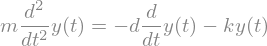

In [4]:
diffeq = sp.Eq(m*y(t).diff(t).diff(t), -d*y(t).diff(t) - k*y(t))
diffeq

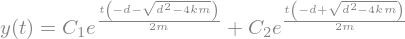

In [5]:
sp.dsolve(diffeq, y(t))

Zahlenbeispiel:

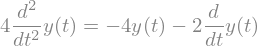

In [6]:
diffeq_bsp = diffeq.subs('m', 4).subs('d', 2).subs('k', 4)
diffeq_bsp

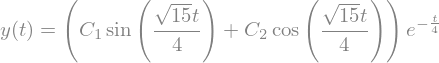

In [7]:
y_bsp = sp.dsolve(diffeq_bsp, y(t))
y_bsp

In [8]:
rcParams['figure.figsize'] = 5, 3

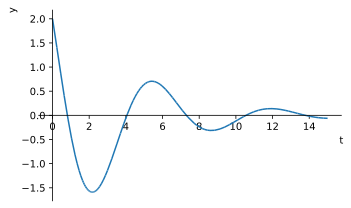

In [9]:
y_plot = y_bsp.subs('C1', -2).subs('C2', 2)
sp.plot(y_plot.args[1], (t, 0.0, 15.0), xlabel="t", ylabel="y");

Beispiele mit Inhomogenität = treibende Kraft:

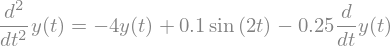

In [10]:
if True: # mit Dämpfung
    diffeq = sp.Eq(y(t).diff(t).diff(t), 
                   -0.25*y(t).diff(t) - 4*y(t) + 1/10*sp.sin(2*t)) 
else:    # Resonanz
    diffeq = sp.Eq(y(t).diff(t).diff(t), 
                   -0.00*y(t).diff(t) - 4*y(t) + sp.sin(2*t)) 

diffeq

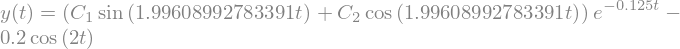

In [11]:
y_bsp = sp.dsolve(diffeq, y(t))
y_bsp

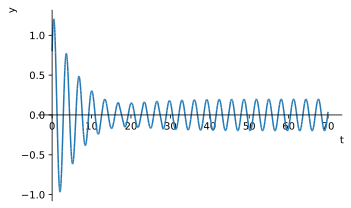

In [12]:
y_plot = y_bsp.subs('C1', 1).subs('C2', 1)
sp.plot(y_plot.args[1], (t, 0.0, 70.0), xlabel="t", ylabel="y");

## Lösungsstruktur

**Homogen mit konstanten Koeffizienten:**

Die allgemeine Lösung der homogenen linearen DGL 2-ter Ordnung mit konstanten Koeffizienten

$$\ddot{y}(t) + a \dot{y}(t) + by(t) = 0$$

ist von der Form

$$y(t) = c_1 y_1(t) + c_2 y_2(t).$$

Dabei bezeichnen $y_1(t)$ und $y_2(t)$ zwei sogenannte **Fundamentallösungen**. Die allgemeine Lösung ist also eine Linearkombination von zwei Fundamentallösungen. 
Diese sind Lösungen der DGL und erfüllen die Eigenschaft

$$\det\begin{pmatrix} y_1 (t) & y_2 (t) \\ \dot{y_1}(t) & \dot{y_2}(t) \end{pmatrix} \neq 0.$$

Jedes **Anfangswertproblem** läßt sich wegen dieser Eigenschaft eindeutig lösen. 

Der **Lösungsansatz** $e^{\lambda t}$ (Exponentialansatz) führt zur **charakteristischen Gleichung**

$$\lambda^2 + a \lambda + b = 0$$

mit Lösungen $\lambda_1$ und $\lambda_2$ und folgenden zugehörigen Fundamentallösungen:

- $\lambda_1$ und $\lambda_2$ ungleich und reell: $y_1(t)=e^{\lambda_1 t}$ und $y_2(t)=e^{\lambda_2 t}$
- $\lambda_1=\lambda_2=:\lambda$ und reell: $y_1(t)=e^{\lambda t}$ und $y_2(t)=te^{\lambda t}$
- $\lambda_{1,2} = \beta\pm i\omega$: $y_1(t)=e^{\beta t}\cos(\omega t)$ und $y_2(t)=e^{\beta t}\sin(\omega t)$

**Inhomogen mit konstanten Koeffizienten:**

Die allgemeine Lösung der inhomogenen linearen DGL 2-ter Ordnung mit konstanten Koeffizienten

$$\ddot{y}(t) + a \dot{y}(t) + by(t) = g(t)$$ 

ist von der Form

$$y(t) = y_h(t) + y_p(t).$$

Dabei ist $y_h(t)$ die allgemeine Lösung der zugehörigen homogenen DGL $\ddot{y}(t) + a \dot{y}(t) + by(t) = 0$ und $y_p(t)$ eine partikuläre Lösung der inhomogenen DGL. Für letztere gibt es unterschiedliche Ansätze je nach der Form von $g(t)$, siehe Literatur.

## Übungsbeispiele

**Aufgaben:**

- Bestimmen Sie die allgemeine Lösung der DGL:

    - $\ddot{y}(t) + 5 \dot{y}(t) + 6y(t) = 0$
    - $\ddot{y}(t) + 4 \dot{y}(t) + 4y(t) = 0$
  
- Bestimmen Sie die Lösung der DGL $\ddot{y}(t) + 4 \dot{y}(t) + 13y(t)=0$, welche die Anfangsbedingungen $y(0)=1$ und $\dot{y}(0)= 10$ erfüllt.

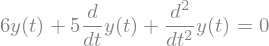

In [13]:
t = sp.symbols('t')
y = sp.symbols('y', cls=sp.Function)
diffeq = sp.Eq(y(t).diff(t).diff(t) + 5*y(t).diff(t) + 6*y(t), 0)
# diffeq = sp.Eq(y(t).diff(t).diff(t) + 4*y(t).diff(t) + 4*y(t), 0)
diffeq

In [14]:
sp.dsolve(diffeq, y(t))

In [15]:
y = sp.exp(-2*t)*sp.cos(3*t) + 4*sp.exp(-2*t)*sp.sin(3*t)
y.subs(t, 0).evalf()

In [16]:
y.diff(t).subs(t, 0).evalf()

In [17]:
sp.init_printing(False)

**Allgemeine Schwingungsgleichung und Resonanz:**

Die DGL einer mechanischen Schwingung und eines elektrischen Schwingkreises lassen sich auf folgende, oft verwendete allgemeine Form bringen: 

$$\ddot{y} + 2\delta \dot{y} + \omega_0^2 y = 0.$$

- Aufgabe 1: Für welche Werte von  $\delta$ und $\omega_0$ schwingt das System, d. h. die charakteristischen Gleichung hat komplexe Lösungen? Bestimmen Sie die Frequenz $\omega$ für diesen Fall.
  
  Lösung: $\lambda_{1,2} = -\delta \pm \sqrt{\delta^2 - \omega_0^2}$, $\delta^2 < \omega_0^2$, $\omega=\sqrt{\omega_0^2 - \delta^2}$
  
  Literatur: Dietmaier: Mathematik für Angewandte Wissenschaften. p. 440f.

- Aufgabe 2: Für diesen Fall wird die allgemeine Lösung oft in der Form 
  
  $$y(t) = e^{-\delta t}[c_1 \cos(\omega t) + c_2 \sin(\omega t)]$$ 
  
  als auch 
  
  $$y(t) = Ae^{-\delta t}\cos(\omega t - \varphi)$$ 
  
  geschrieben. Wie hängen diese zwei zusammen? Interpretieren Sie die beiden Formen und machen Sie Beispielplots.

  Lösung: $c_1 = A\cos(\varphi)$, $c_2 = A\sin(\varphi)$, Additionstheorem $\cos(\omega t)\cos(\varphi) + \sin(\omega t)\sin(\varphi) = \cos(\omega t - \varphi)$
  
  Literatur: Dietmaier: Mathematik für Angewandte Wissenschaften. p. 440f.

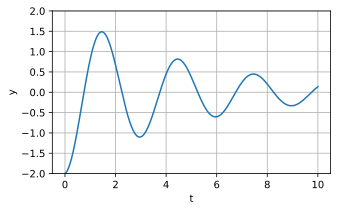

In [18]:
t = linspace(0, 10, 500)
A = 2              # Anfangsamplitude
delta= 0.2         # Dämpfungsfaktor
omega = 2*pi/3     # Kreisfrequenz
phi = pi           # Phasenverschiebung
y = A*exp(-delta*t)*cos(omega*t - phi)

figure(figsize=(5,3))
plot(t, y)
xlabel('t')
ylabel('y')
ylim(-A,A)
grid(True)

- Aufgabe 3: Eine harmonisch erzwungene Schwingung hat die allgemeine Form 

  $$\ddot{y} + 2\delta \dot{y} + \omega_0^2 y = a\cos(\tilde{\omega}t).$$ 
  
  Eine partikuläre Lösung lautet 
  
  $$y_p(t) = A\cos(\tilde{\omega}t - \varphi)$$ 
  
  mit 
  
  $$A = \frac{a}{\sqrt{(\omega_0^2 - \tilde{\omega}^2)^2 +4\delta^2\tilde{\omega}^2 }}.$$ 
  
  Bei welchem Wert der Erregerfrequenz $\tilde{\omega}$ ist die Amplitude $A$ maximal, d. h. herrscht Resonanz? 

  Lösung: Ableiten nach $\tilde{\omega}$ liefert die Resonanzfrequenz $\omega_r= \sqrt{\omega_0^2 - 2\delta^2} < \omega < \omega_0$
  
  Literatur: Papula: Band2 IV, 4.1.4; Feynman: The Feynman Lectures on Physics, Vol. 1, [Chapter 23 Resonance](http://feynmanlectures.caltech.edu/I_23.html)

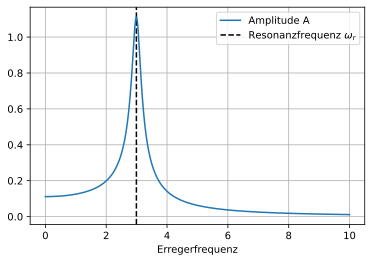

In [19]:
# delta < omega_0:
delta   = 0.15
omega_0 = 3
omega_t = linspace(0, 10, num=500)
a       = 1

A = a/sqrt( (omega_0**2 - omega_t**2)**2 + 4*delta**2*omega_t**2 )
omega_r = sqrt(omega_0**2 - 2*delta**2)

figure(figsize=(6,4))
plot(omega_t, A, label='Amplitude A')
y0, y1 = ylim()
vlines(omega_r, y0, y1, linestyle='--', label='Resonanzfrequenz $\omega_r$')
ylim(y0, y1)
xlabel('Erregerfrequenz')
legend()
grid(True)